# Pymaceuticals Inc.

## Module 5

### Analysis

-The gender of the mice did not play a significant role in how responsive the mouse was to the drug. The mouse gender was almost at a 1:1 ratio and it seemed that it didn't really play a role on the effectiveness of the drug. The most effective drugs in the study seem to be Capomulin and Ramicane. They had the lowest rate of tumor volume among the 4 drugs. Capomulin effectiveness seem to peak at a couple days past the 30 day Timepoint reducing the tumor volume by almost 4 (mm3). There did seem to be a correlation between weight and the tumor volume and as the weight increased so did the tumor volume.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [58]:
#CSV read files into variable
mouse_metadata = pd.read_csv("data/mouse_metadata.csv")
study_results = pd.read_csv("data/study_results.csv")

#Merged files into on DF
mouse_data = pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

#Displayed DF
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [59]:
#The number of mice in DF.
mouse_count = len(mouse_data["Mouse ID"].value_counts())

mouse_count

249

In [60]:
#Getting the value of the duplicate from DF
duplicate_mouse = mouse_data.loc[mouse_data.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [61]:
#All the duplicate data from Mouse ID
duplicate_index = mouse_data.set_index("Mouse ID")
duplicate_index.loc["g989"]

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [62]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID
mouse_data_clean = mouse_data.drop_duplicates(duplicate_index)

#Displayed Clean DF
mouse_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [63]:
#New count of mice in data frame
new_count = len(mouse_data_clean["Mouse ID"].value_counts())
new_count

248

# Summary Statistics

In [64]:
#Grouped the clean data by drug refimen and found the mean, median,variance, std. devation, and sem for the tumor volume
tumor_volume_mean = mouse_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_volume_median = mouse_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_variance = mouse_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = mouse_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_std_err = mouse_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

#Created the DF of the data that was collected
summary_stats = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean, "Median Tumor Volume": tumor_volume_median, 
                              "Tumor Volume Variance": tumor_volume_variance,"Tumor Volume Std. Dev.": tumor_volume_std_dev,
                             "Tumor Volume Std. Err.": tumor_volume_std_err})
#Displayed DF
summary_stats.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,53.019963,51.852437,42.782010,6.540796,0.494438
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.134515,52.343085,60.928203,7.805652,0.583422
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.195673,40.668343,23.488945,4.846539,0.321676
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
#Used the aggregation function to get the previous DF in one line of code 
tumor_vol_stats =  mouse_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

#Aggregated DF table displayed 
tumor_vol_stats.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,53.019963,51.852437,42.782010,6.540796,0.494438
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.134515,52.343085,60.928203,7.805652,0.583422
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.195673,40.668343,23.488945,4.846539,0.321676
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar Charts

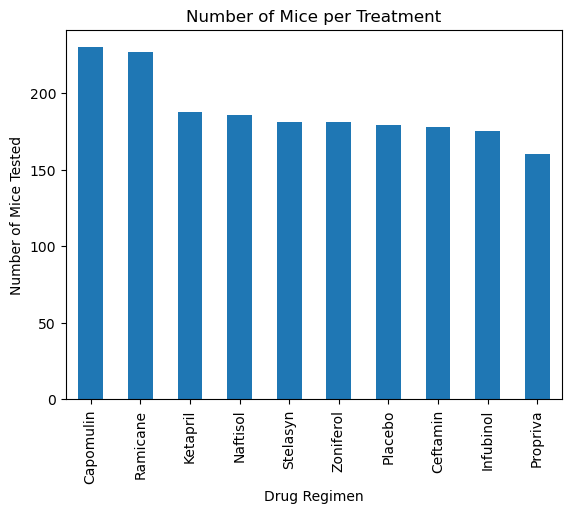

In [66]:
#Collected the count of mice tested per drug Regimen 
mice_tested = mouse_data_clean.groupby(["Drug Regimen"])["Timepoint"].count()

#Setup labels for X axis, Y axis, and title
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Treatment")

#Display Bar Graph
mice_bar = mice_tested.sort_values(ascending=False).plot.bar()


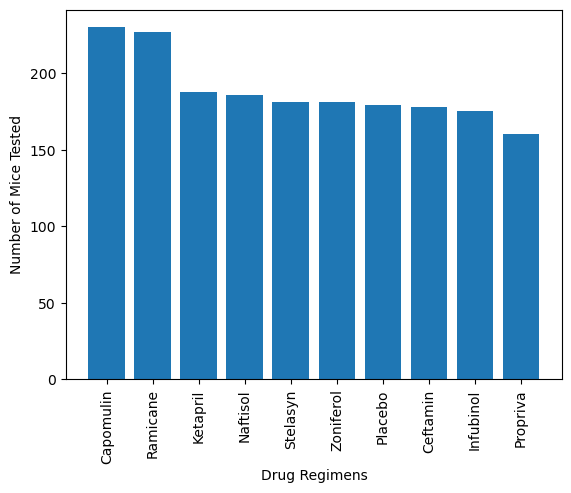

In [67]:
#Got values for bar graph
mouse_bar = mouse_data_clean["Drug Regimen"].value_counts()
x_axis = mouse_bar.index.values
y_axis = mouse_bar.values
#made graph and labeled headers
plt.bar(x_axis, y_axis,)

plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation= "vertical")
#Displayed graph
plt.show()

# Pie Chart

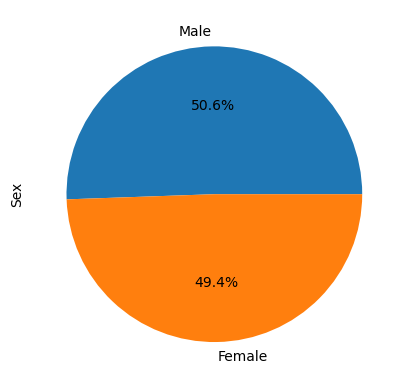

In [68]:
#Used the Sex value to get data for graph 
mice_genders = mouse_data_clean["Sex"].value_counts()

#Made graph 
mice_pie = mice_genders.plot.pie(autopct="%1.1f%%")

#Displayed Graph 
plt.show()

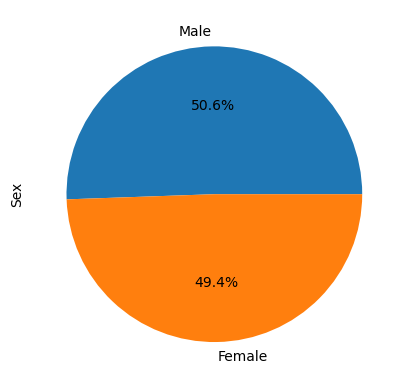

In [69]:
#set variable for labels
mice_labels = mice_genders.index.values

#Made Pie chart
plt.pie(mice_genders,explode=None,labels=mice_labels, autopct="%1.1f%%")
plt.ylabel("Sex")

#Displayed Pie Chart
plt.show()

# Quartiles, Outliers, and Boxplots

In [70]:
#Created new DF with the max value sets and reset the index
mouse_max = mouse_data_clean.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
#Combined the DF 
mouse_max_combined = pd.merge(mouse_max, mouse_data_clean, on=["Mouse ID","Timepoint"] )
#Displayed the DF
mouse_max_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [71]:
#Put treatments into a list for for loop (and later for plot labels)
drug_used = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [72]:
# Create empty list to fill with tumor vol data (for plotting)
tv_cap = []
tv_ram = []
tv_inf = []
tv_cef = []

In [73]:
#For Loop used to itterate through Drug Regimen and append the Tumor Volume to tumor vol list
for drug, row in mouse_max_combined.iterrows():
    if row["Drug Regimen"] == drug_used[0]:
        tv_cap.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == drug_used[1]:
        tv_ram.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == drug_used[2]:
        tv_inf.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == drug_used[3]:
        tv_cef.append(row["Tumor Volume (mm3)"])

In [74]:
#Combined list made df
drug_data = pd.DataFrame({drug_used[0]: tv_cap, drug_used[1]: tv_ram, drug_used[2]: tv_inf, drug_used[3]: tv_cef})
drug_data

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


# Line Plot


In [77]:
#USed clean data to filter only the drug regimen of Capomulin
mouse_cap = mouse_data_clean.loc[mouse_data_clean["Drug Regimen"] == "Capomulin",:]
mouse_cap.head

<bound method NDFrame.head of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
226      j246          0           45.000000                 0    Capomulin   
227      r554          0           45.000000                 0    Capomulin   
228      s185          0           45.000000                 0    Capomulin   
229      b742          0           45.000000                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1854     s710         45           40.728578                 1    Capomulin   
1859     j119         45           38.125164                 1    Capomulin   
1878     i557         45           47.685963                 1    Capomulin   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   

         Sex  Age_mon

In [78]:
#Used previous DF to find a Capomulin Mouse ID to use for isolation
line_data = mouse_cap.loc[mouse_cap["Mouse ID"] == "b128",:]
line_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22


In [82]:
#found the x of the isolated Mouse ID Timepoint
x_axis = line_data["Timepoint"]
#found the y of the isolated Mouse ID Tumor Volume
t_vol = line_data["Tumor Volume (mm3)"]

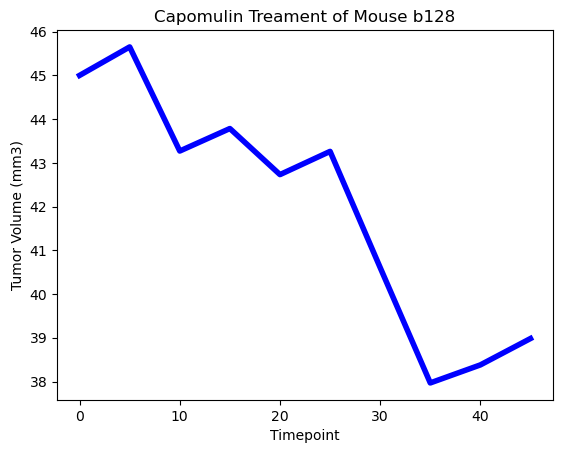

In [88]:
#Ploted Line Graph
plt.plot(x_axis, t_vol, linewidth=4, color="blue")
plt.title("Capomulin Treament of Mouse b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
#Displayed Line Graph
plt.show()

# Scatter Plot

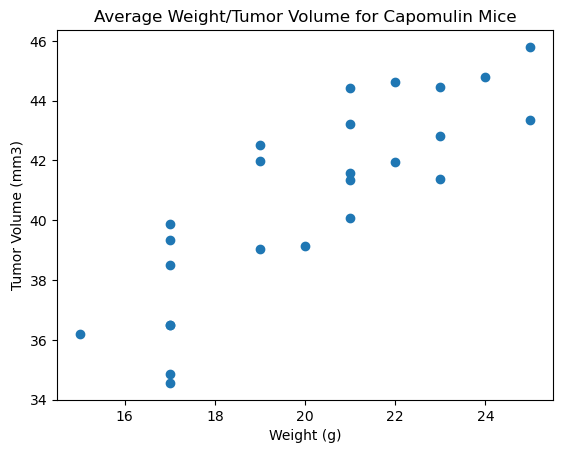

In [95]:
#Used groupby to find the mean of the mouse IDs
mouse_cap_avrg = mouse_cap.groupby(["Mouse ID"]).mean(numeric_only=True)

#Used the mean weight and tumor to plot scatter plot and created graph
plt.scatter(mouse_cap_avrg["Weight (g)"],mouse_cap_avrg["Tumor Volume (mm3)"])
plt.title("Average Weight/Tumor Volume for Capomulin Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# Correlation and Regression

In [108]:
# Calculate the correlation coefficient
corl = st.pearsonr(mouse_cap_avrg["Weight (g)"],mouse_cap_avrg["Tumor Volume (mm3)"])
print(f'The correlation between mouse weight and the average tumor volume is {round(corl[0],2)}')

The correlation between mouse weight and the average tumor volume is 0.84


In [115]:
## Calculate the linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_cap_avrg["Weight (g)"], mouse_cap_avrg["Tumor Volume (mm3)"])
regress_value = mouse_cap_avrg["Weight (g)"] * slope + intercept

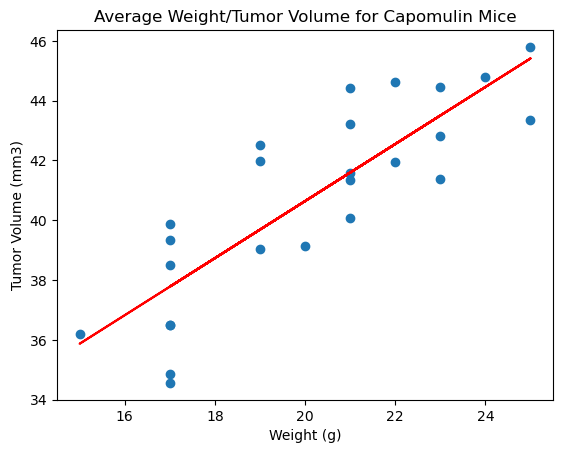

In [116]:
#Used scatter plot and the regession line
plt.scatter(mouse_cap_avrg["Weight (g)"],mouse_cap_avrg["Tumor Volume (mm3)"])
plt.plot(mouse_cap_avrg["Weight (g)"], regress_value, color = 'red')
plt.title("Average Weight/Tumor Volume for Capomulin Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()